#Figure 7: Nonlinear point projections introduce distortions relative in logcal neighborhoods.

In this notebook, we examine the La Manno et al. human forebrain dataset, process it using the standard workflow, and quantify the effect of dimensionality reduction on local neighborhoods (as defined by Jaccard distances on the identities of $k=150$ nearest neighbors).

# Dependencies

In [1]:
import time
t1 = time.time()

In [2]:
## uncomment this cell if run in colab ##

%%capture
!pip install --upgrade git+https://github.com/meichenfang/velocyto.py.git
!pip install scanpy umap-learn

In [3]:
!mkdir -p figure
!mkdir -p data

Here, the `hgForebrainGlut.loom` and `vis.py` files need to be uploaded.

In [4]:
from vis import * 

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [5]:
# ## run locally ##
# %cd ../../GFCP_2021
# from vis import * 
# %cd notebooks

# Load data and preprocess

In [6]:
vlm = vcy.VelocytoLoom(loom_filepath="data/hgForebrainGlut.loom")
preprocess(vlm)

# Generate figure 7

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


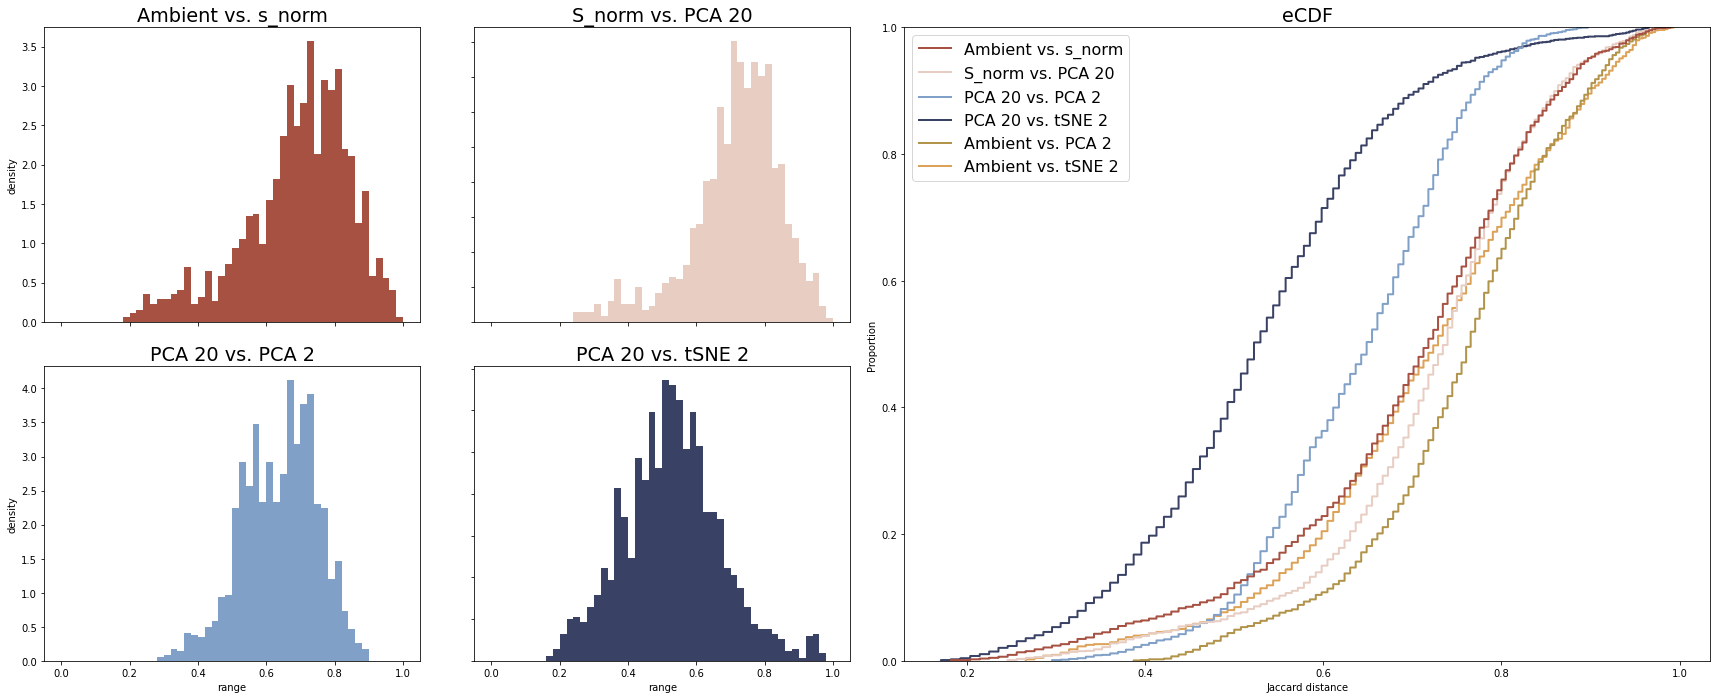

In [7]:
fig = plt.figure(figsize=(24,10))
ax0 = plt.subplot2grid((2, 4), (0, 0))
ax1 = plt.subplot2grid((2, 4), (0, 1))
ax2 = plt.subplot2grid((2, 4), (1, 0))
ax3 = plt.subplot2grid((2, 4), (1, 1))
ax4 = plt.subplot2grid((2, 4), (0, 2), rowspan=2, colspan=2)

n_neigh=150
plt.rcParams.update({'font.size': 16})

fracs=[]
labels=["Ambient vs. s_norm","S_norm vs. PCA 20","PCA 20 vs. PCA 2","PCA 20 vs. tSNE 2","Ambient vs. PCA 2",'Ambient vs. tSNE 2']
makeEmbeds(vlm, embeds="PCA", x_name="S")

ax0.set_title(labels[0])
ax0.axes.xaxis.set_ticklabels([]) 
ax0.set_ylabel("density")
fracs.append(plotJaccard(vlm.S.T, vlm.S_norm.T, ax0, n_neigh=n_neigh, c=vermeer[0]))

ax1.set_title(labels[1])
ax1.axes.xaxis.set_ticklabels([]) 
ax1.axes.yaxis.set_ticklabels([]) 
fracs.append(plotJaccard(vlm.PCA[:,:20], vlm.S_norm.T, ax1, n_neigh=n_neigh, c=vermeer[1]))

ax2.set_title(labels[2])
ax2.set_xlabel("range") 
ax2.set_ylabel("density")

fracs.append(plotJaccard(vlm.PCA[:,:20],vlm.PCA[:,:2], ax2, n_neigh=n_neigh, c=vermeer[2]))

ax3.set_title(labels[3])
ax3.set_xlabel("range") 
ax3.axes.yaxis.set_ticklabels([]) 
makeEmbeds(vlm, embeds="tSNE", x_name="S_norm")
fracs.append(plotJaccard(vlm.PCA[:,:20], vlm.ts, ax3, n_neigh=n_neigh, c=vermeer[3]))

fracs.append(getJaccard(vlm.S.T, vlm.PCA[:,:2], n_neigh=n_neigh))
fracs.append(getJaccard(vlm.S.T, vlm.ts, n_neigh=n_neigh))

fracs_pd=pd.DataFrame(data=np.transpose(fracs),columns=labels)

ax4.set_title("eCDF")
ax4.set_xlabel("Jaccard distance")
vermeer.pop(4)
sn.ecdfplot(fracs_pd,ax=ax4,palette=vermeer[:6],linewidth=2)
fig.tight_layout()
fig.savefig('figure/embed_neighbors_jaccard_lme_raw.png',dpi=600)

In [8]:
t2 = time.time()
print('Runtime: {:.2f} seconds.'.format(t2-t1))

Runtime: 95.87 seconds.
